# Importing Libraries

In [1]:
import numpy as numpy
import pandas as pd

To visualize the data in the project

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import sklearn
from sklearn.utils import shuffle 
from sklearn.feature_extraction.text import TfidfVectorizer

NLP Preprocessing libraries

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [5]:
import re
import random
import gensim

In [6]:
from collections import Counter
import unicodedata as udata
import string

checking the versions 

In [7]:
print(sklearn.__version__)
print(matplotlib.__version__)
print(numpy.__version__)
print(pd.__version__)
print(nltk.__version__)

0.20.0
3.0.2
1.14.6
0.23.4
3.3


# Reading csv file

In [105]:
df = pd.read_csv("TwitterSentimentAnalysis.csv", encoding='latin-1', header=None)

Shuffling the data in the data frame

In [106]:
df = df.sample(frac=1).reset_index(drop=True)

# Give column names

Assigning the Columns name to the data

In [107]:
df.columns = ["sentiment", "id", "date", "query", "user", "text"] 

In [108]:
df.columns

Index(['sentiment', 'id', 'date', 'query', 'user', 'text'], dtype='object')

Checking Null values in the dataset. Here we are counting each cloumn null values in the data set

In [109]:
df.isnull().sum()

sentiment    0
id           0
date         0
query        0
user         0
text         0
dtype: int64

Checking the duplicates values and counting duplicates in the data set

In [110]:
df.duplicated().sum()

0

get the first 5 rows from the dataframe

In [111]:
df.head(5)

,sentiment,id,date,query,user,text
0,4,1880323927,Fri May 22 00:50:28 PDT 2009,NO_QUERY,IHCF,i love you
1,4,2059478439,Sat Jun 06 17:00:58 PDT 2009,NO_QUERY,cryst0clearre,yaY! my phone is back on!
2,4,1693379887,Sun May 03 22:22:17 PDT 2009,NO_QUERY,b2therooke,@espisc thanks!
3,4,1835593196,Mon May 18 06:20:19 PDT 2009,NO_QUERY,AmandaGierusz,I watched the best workout show this morning i...
4,0,2228331816,Thu Jun 18 14:18:26 PDT 2009,NO_QUERY,fshoemark_smith,Last day of college today and I already miss ...


drop some column from the dataframe 

In [114]:
df = df.drop(["id", "date", "query", "user"], axis = 1) 

In [115]:
df.head(5)

,sentiment,text
0,4,i love you
1,4,yaY! my phone is back on!
2,4,@espisc thanks!
3,4,I watched the best workout show this morning i...
4,0,Last day of college today and I already miss ...


 count the number of sentiments with respect to their tweet (4 stands for positive tweet and 0 stands for negative tweet)

In [116]:
df.sentiment.value_counts()

4    800000
0    800000
Name: sentiment, dtype: int64












# Cleaning data

add new column pre_clean_len to dataframe which is length of each tweet

In [117]:
df['pre_clean_len'] = [len(t) for t in df.text]

Finding outliers using Box plot using pre_clean_len column

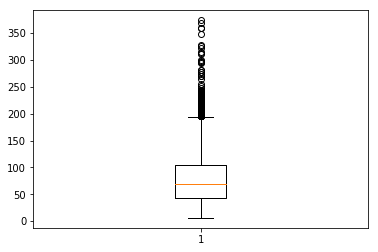

In [118]:
plt.boxplot(df.pre_clean_len)
plt.show()

check for any tweets greater than 140 characters

In [119]:
df[df.pre_clean_len > 140].head(10) 

,sentiment,text,pre_clean_len
19,4,@briannalicia To regain focus. Change location...,141
120,0,@LuisCamachoJr Nice to hear from you was busy ...,146
201,0,"I'm up still,can't sleep&amp;thinkin about jes...",146
276,0,Russian Roulette is not the same without a gun...,141
502,4,@tommcfly Hi! i and another 10 girls have shou...,148
641,4,Can't stop listening to the &quot;Once&quot; s...,146
736,4,@IamDrewMoney I'm pretty positive that it'll s...,141
909,4,".@Gartnergreg Hm. Tsar, czar _&amp;_ Kaiser al...",150
980,4,SHE'S on a BOAT-cue the music..&quot;Watch the...,143
1333,4,@helenthornber &quot;what a wonderful world it...,144


At this stage, if you want you could remove these outlier tweets

# Cleaning operations

#Importing beautiful soup
#remove @ mentions from tweets
#remove URLs from tweets
#converting words like isn't to is not
#get only text from the tweets 
#remove utf-8-sig code
#converting all into lower case
#will replace non-alphabetic characters by space
#Word Punct Tokenize and only consider words whose length is greater than 1
#join the words

In [120]:
import re
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'        # remove @ mentions from tweets
pat2 = r'https?://[^ ]+'        # remove URLs from tweets
combined_pat = r'|'.join((pat1, pat2)) #addition of pat1 and pat2
www_pat = r'www.[^ ]+'         # remove URLs from tweets
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",   # converting words like isn't to is not
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):  # define tweet_cleaner function to clean the tweets
    soup = BeautifulSoup(text, 'lxml')    # create beautiful soup object
    souped = soup.get_text()   # get only text from the tweets 
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")    # remove utf-8-sig code
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed) # calling combined_pat
    stripped = re.sub(www_pat, '', stripped) #remove URLs
    lower_case = stripped.lower()      # converting all into lower case
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case) # converting words like isn't to is not
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)       # will replace # by space
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1] # Word Punct Tokenize and only consider words whose length is greater than 1
    return (" ".join(words)).strip() # join the words

In [121]:
#Note that we have 1600000 instances. But processing so many instances will take a very very long time.
#Hence, restricting to rather 50000 instances.
limit=50000
import time; 
ms = time.time()
#nums = [0,400000,800000,1200000,1600000] # used for batch processing tweets
#nums = [0, 9999]
clean_tweet_texts = [] # initialize list
for i in range(0,limit): # batch process 1.6 million tweets 
    if i % 10000==0:
        print(i, time.time()-ms)
    clean_tweet_texts.append(tweet_cleaner(df['text'][i]))  # call tweet_cleaner function and pass parameter as all the tweets to clean the tweets and append cleaned tweets into clean_tweet_texts list

0 0.0024759769439697266
10000 2.872504711151123
20000 5.62529444694519
30000 8.349005460739136
40000 11.006449460983276


# clean_tweet_texts

In [122]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

tokenize word in clean_tweet_texts and append it to word_tokens list

In [123]:
word_tokens = [] # initialize list for tokens
for word in clean_tweet_texts:  # for each word in clean_tweet_texts
    word_tokens.append(word_tokenize(word)) #tokenize word in clean_tweet_texts and append it to word_tokens list

# Lemmatizing

In [124]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [125]:
df1 = [] # initialize list df1 to store words after lemmatization
from nltk.stem import WordNetLemmatizer # import WordNetLemmatizer from nltk.stem
lemmatizer = WordNetLemmatizer() # create an object of WordNetLemmatizer
for l in word_tokens: # for loop for every tokens in word_token
    b = [lemmatizer.lemmatize(q) for q in l] #for every tokens in word_token lemmatize word and giev it to b
    df1.append(b) #append b to list df1

# df

In [126]:
clean_df1 =[] # initialize list clean_df1 to join word tokens after lemmatization
for c in df1:  # for loop for each list in df1
    a = " ".join(c) # join words in list with space in between and give it to a
    clean_df1.append(a) # append a to clean_df1

# clean_df1

convert clean_tweet_texts into dataframe and name it as clean_df

In [127]:
clean_df = pd.DataFrame(clean_df1,columns=['text']) # convert clean_tweet_texts into dataframe and name it as clean_df
#clean_df['target'] = df.sentiment[:10000] # from earlier dataframe get the sentiments of each tweet and make a new column in clean_df as target and give it all the sentiment score
#clean_df

In [128]:
clean_df['clean_len'] = [len(t) for t in clean_df.text] # Again make a new coloumn in the dataframe and name it as clean_len which 

In [129]:
clean_df[clean_df.clean_len > 140].head(10) # again check if any tweet is more than 140 characters

,text,clean_len


In [130]:
target2 = [] # initialize list
for i in range(0,limit): # batch process 1.6 million tweets 
    target2.append(df['sentiment'][i])
clean_df['target']=target2
df.head()

,sentiment,text,pre_clean_len
0,4,i love you,11
1,4,yaY! my phone is back on!,26
2,4,@espisc thanks!,16
3,4,I watched the best workout show this morning i...,73
4,0,Last day of college today and I already miss ...,53


In [131]:
X = clean_df.text # get all the text in x variable
y = clean_df.target # get all the sentiments into y variable
print(X.shape) #print shape of x
print(y.shape) # print shape of y
from collections import Counter
print(set(y)) # equals to list(set(words))
print(Counter(y).values()) #

(50000,)
(50000,)
{0, 4}
dict_values([24864, 25136])


# perform train and test split

X_train is the tweets of training data, X_test is the testing tweets which we have to predict, y_train is the sentiments of tweets in the traing data and y_test is the sentiments of the tweets  which we will use to measure the accuracy of the model

In [132]:
from sklearn.model_selection  import train_test_split #from sklearn.cross_validation import train_test_split to split the data into training and tesing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 1) # split the data into traing and testing set where ratio is 80:20

#Get Tf-idf object and save it as vect. We can select features from here we just have simply change 
#the ngram range to change the features also we can remove stop words over here with the help of stop parameter

In [133]:
vect = TfidfVectorizer(analyzer = "word", ngram_range=(1,3))

# fit or training data tweets to vect

transform our training data tweets

In [134]:
vect.fit(X_train) 
X_train_dtm = vect.transform(X_train) 

transform our testing data tweets

In [135]:
X_test_dtm = vect.transform(X_test)

# Naive Bayes

In [136]:
from sklearn.naive_bayes import MultinomialNB # import Multinomial Naive Bayes model from sklearn.naive_bayes
nb = MultinomialNB(alpha = 10) # get object of Multinomial naive bayes model with alpha parameter = 10

In [137]:
nb.fit(X_train_dtm, y_train)# fit our both training data tweets as well as their sentiments to the multinomial naive bayes model

MultinomialNB(alpha=10, class_prior=None, fit_prior=True)

In [138]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = nb, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.7524246813952925

predict the sentiments of testing data tweets

In [139]:
y_pred_nb = nb.predict(X_test_dtm) 

measure the accuracy of our model on the testing data

In [140]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_nb) 

0.7623

plot the confusion matrix between our predicted sentiments and the original testing data sentiments

In [141]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_nb) 

array([[4441,  621],
       [1756, 3182]])

# Logistic regression

In [142]:
from sklearn.linear_model import LogisticRegression # import Logistic Regression model from sklearn.linear_model
logisticRegr = LogisticRegression(C = 1.1) # get object of logistic regression model with cost parameter = 1.1

In [143]:
logisticRegr.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the logistic regression model

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [144]:
from sklearn.model_selection import cross_val_score # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = logisticRegr, X = X_train_dtm, y = y_train, cv = 10) # do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

/root/anaconda3/envs/py36/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.77572563880004

In [145]:
y_pred_lg = logisticRegr.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [146]:
from sklearn import metrics # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_lg) # measure the accuracy of our model on the testing data

0.7776

In [147]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_lg) # plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[4077,  985],
       [1239, 3699]])

# SVC

In [148]:
from sklearn.svm import LinearSVC # import SVC model from sklearn.svm
svm_clf = LinearSVC(random_state=0) # get object of SVC model with random_state parameter = 0

In [149]:
svm_clf.fit(X_train_dtm, y_train)# fit our both traing data tweets as well as its sentiments to the SVC model

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [150]:
from sklearn.model_selection import cross_val_score  # import cross_val_score from sklear.model_selection
accuracies = cross_val_score(estimator = svm_clf, X = X_train_dtm, y = y_train, cv = 10)# do K- fold cross validation on our traing data and its sentimenst with 10 fold cross validation
accuracies.mean() # measure the mean accuray of 10 fold cross validation

0.7842003391968962

In [151]:
y_pred_svm = svm_clf.predict(X_test_dtm)  # predict the sentiments of testing data tweets

In [152]:
from sklearn import metrics  # import metrics from sklearn
metrics.accuracy_score(y_test, y_pred_svm)  # measure the accuracy of our model on the testing data

0.7867

In [153]:
from sklearn.metrics import confusion_matrix # import confusion matrix from the sklearn.metrics
confusion_matrix(y_test, y_pred_svm)# plot the confusion matrix between our predicted sentiments and the original testing data sentiments

array([[4100,  962],
       [1171, 3767]])

# Decision Trees

In [154]:
from sklearn.tree import DecisionTreeClassifier
clf_dtc = DecisionTreeClassifier(random_state = 100, max_depth=3, min_samples_leaf=5) 

In [155]:
clf_dtc.fit(X_train_dtm, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [156]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_dtc, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.5758001475453217

In [157]:
y_pred_dtc = clf_dtc.predict(X_test_dtm)

In [158]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_dtc) 

0.5663

In [159]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dtc)

array([[1194, 3868],
       [ 469, 4469]])

# Boosted Trees

In [160]:
from sklearn.ensemble import AdaBoostClassifier
clf_boost = AdaBoostClassifier(n_estimators=100, base_estimator=None,learning_rate=1)

In [161]:
clf_boost.fit(X_train_dtm, y_train) 

In [162]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_boost, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.7161248358468647

In [163]:
y_pred_boost = clf_boost.predict(X_test_dtm)

In [164]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_boost) 

0.7284

In [165]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_boost)

array([[3403, 1659],
       [1057, 3881]])

# Random Forest

In [166]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators = 100, random_state = 42)

In [167]:
clf_rf.fit(X_train_dtm, y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [168]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_rf, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.7609249755187484

In [169]:
y_pred_rf = clf_rf.predict(X_test_dtm)

In [170]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_rf)

0.7637

In [171]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_rf)

array([[3814, 1248],
       [1115, 3823]])

# Nearest Neighbour

In [172]:
from sklearn.neighbors import KNeighborsClassifier  
clf_knn = KNeighborsClassifier(n_neighbors=5)

In [173]:
clf_knn.fit(X_train_dtm, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [174]:
from sklearn.model_selection import cross_val_score 
accuracies = cross_val_score(estimator = clf_knn, X = X_train_dtm, y = y_train, cv = 10)
accuracies.mean()

0.5163256757812923

In [175]:
y_pred_knn = clf_knn.predict(X_test_dtm)

In [176]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_knn) 

0.5347

In [177]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[2462, 2600],
       [2053, 2885]])